# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [38]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [39]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [40]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [41]:
#use shape method of the data set to return the number of rows and columns respectively
df.shape

(1898, 9)

#### Observations:
The data has 1,898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [42]:
# Use info() to print a concise summary of the DataFrame and also show the data types of each column present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- The data has 4 type int entries, 4 string entires and 1 float entry

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [43]:
# isnull() function is used to return the nan values in the data set columns
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- There are **no missing values** in the data set

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [44]:
# use describe function to return the statistical summary of all the columns
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
- What is the minimum time it takes for food to be prepared once an order is placed? **20 minutes**
- What is the average time it takes for food to be prepared once an order is placed? **27.37 minutes** 
- What is the maximum time it takes for food to be prepared once an order is placed? **35 minutes** 

### **Question 5:** How many orders are not rated? [1 mark]

In [45]:
# Use value counts on the rating column of the data set
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
**736 orders** out of 1,898 orders have not been given ratings

In [46]:
df['restaurant_name'].nunique()

178

There are **178** unique restaurant names in the survey.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

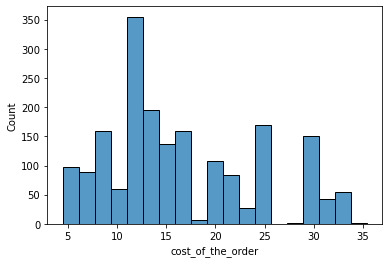

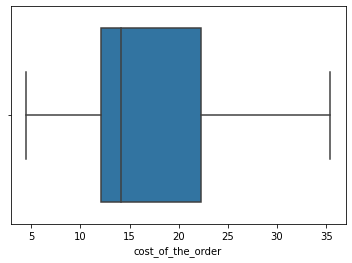

In [47]:
# Cost of the order analysis
sns.histplot(data=df, x = 'cost_of_the_order')
plt.show()
sns.boxplot(data=df, x ='cost_of_the_order')
plt.show()

- The order costs vary from 5 dollars to a maximum of 35 dollars
- There are no extreme outliers cost of orders in the data set

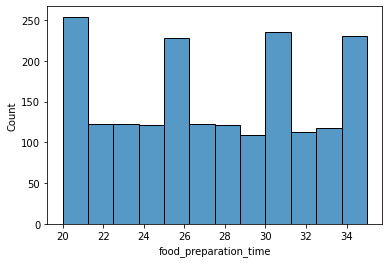

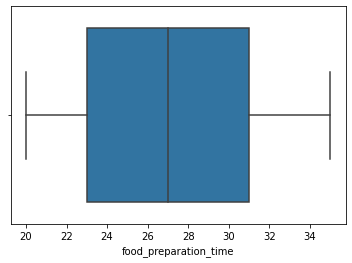

In [48]:
# Food preparation Time Analysis
sns.histplot(data=df, x = 'food_preparation_time')
plt.show()
sns.boxplot(data=df, x ='food_preparation_time')
plt.show()

- Food preparation time takes about 20 to 35 Minutes
- On average, food is prepared using 27 minutes
- There are no outliers indicating there is no food that takes very few or very many minutes to prepare

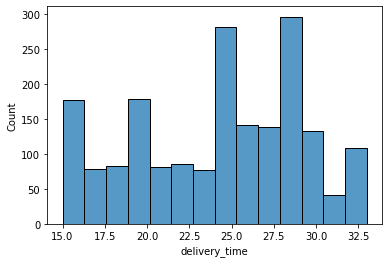

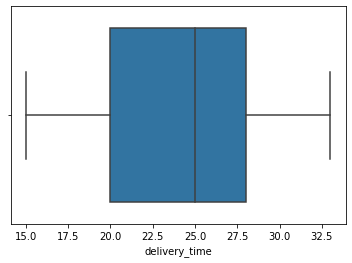

In [49]:
# delivery_time	analysis
sns.histplot(data=df, x = 'delivery_time')
plt.show()
sns.boxplot(data=df, x ='delivery_time')
plt.show()

- 50% of the time food is delivered within 25 minutes of the order pick up
- Food delivery takes betweem 15 minutes to 33 minutes
- There are no outliers in the data for delivery times.

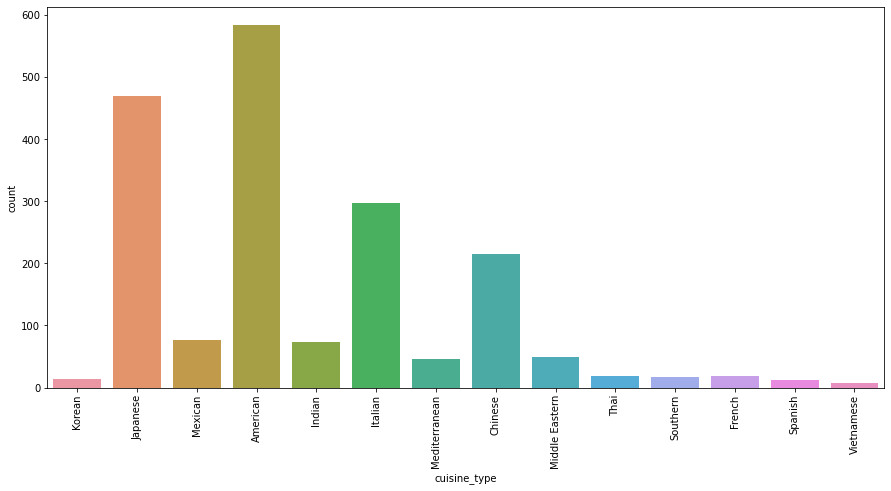

In [50]:
#Show a plot of different cuisine to show popularity of cuisines
plt.figure(figsize = (15,7))
sns.countplot(data= df, x = 'cuisine_type')
plt.xticks(rotation = 90)
plt.show()

- American, Japanese, Italian and Chinese cuisine types are among the favorite cuisine
- Korean and Vietnamese cuisine typs among the least favorite
- The top cuisine has been ordered almost 600 times

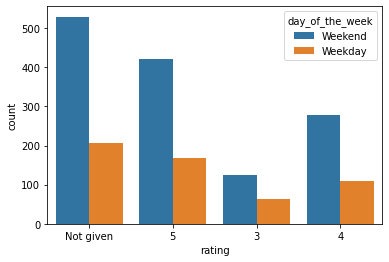

In [51]:
#Show a count plot of ratings given separated over the day of the week as hue
sns.countplot(data= df, x = 'rating',hue = 'day_of_the_week');

- Most of the food orders were made over the weekend as compared to the weekdays

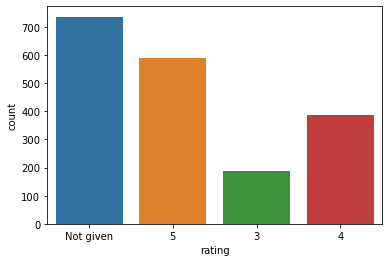

In [52]:
#An sns plot to show the distribution of ratings that has been given
sns.countplot(data= df, x = 'rating');

- For the orders that were given ratings, most were highly rated at 5
- Only 3 ratings were given, that is 3, 4 and 5

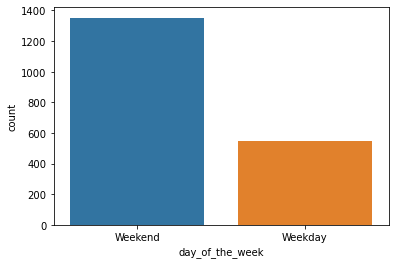

In [53]:
#An sns plot to show the distribution of ratings that has been given
sns.countplot(data= df, x = 'day_of_the_week');

- There are more orders made over the weekends than those made on weekdays.
- The number of orders made over weekends is three times that made over weekdays.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [54]:
top_five_restaurants = df['restaurant_name'].value_counts(ascending = False).head()
print('The top 5 restaurants in terms of the number of orders received are: ')
print('-'*65)
top_five_restaurants.head()

The top 5 restaurants in terms of the number of orders received are: 
-----------------------------------------------------------------


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants ranked in terms of received orders are
1. Shake Shack
2. The meatball shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicked
5. Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [55]:
#Create a filter for the weekends only
df_weekend = df[df['day_of_the_week'] == 'Weekend']
#Rank the favorite cuisines from the filter and show only the top.
df_weekend['cuisine_type'].value_counts(ascending = False).head()

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:
- **American cuisine** is the most popular cuisine on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [56]:
# Create a new list consisting of only those orders that cost more than USD 20
df_greater_than_20_usd = df[df['cost_of_the_order']>20].count()[0]

# DOa count and percentage calculation of the total
count_off_all_orders = df['cost_of_the_order'].count()
percentage_of_orders_greater_than_20_usd = round(df_greater_than_20_usd/count_off_all_orders*100,2)

print('The percentage of the orders that cost more than 20 dollars is', percentage_of_orders_greater_than_20_usd,'%')

The percentage of the orders that cost more than 20 dollars is 29.24 %


#### Observations:
The percentage of the orders that cost more than 20 dollars is **29.24 %**

### **Question 10**: What is the mean order delivery time? [1 mark]

In [57]:
#Use the mean() function to return the mean ordet delivery time
order_delievery_time_mean = df['delivery_time'].mean()
print('The mean order delivery time is', round(order_delievery_time_mean,2),'minutes')

The mean order delivery time is 24.16 minutes


#### Observations:
The mean order delivery time is **24.16 minutes**

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [58]:
# sum the appearances of the customer ids in the data set and show the top 3
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
- The top 3 customers in terms of making orders are **customer IDs 52832, 47440, 83287** with 13, 10 and 9 orders respectively

In [59]:
#Display the 13 orders that were made by the most frequent customer
df[df['customer_id']==52832].reset_index()

,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,247,1478179,52832,Han Dynasty,Chinese,12.23,Weekend,3,33,27
1,272,1477314,52832,ilili Restaurant,Middle Eastern,9.46,Weekday,4,25,25
2,517,1476916,52832,Dickson's Farmstand Meats,American,15.72,Weekend,4,23,28
3,526,1478160,52832,Donburi-ya,Japanese,15.86,Weekday,5,28,28
4,632,1478265,52832,Dos Caminos,Mexican,16.06,Weekend,Not given,35,19
5,670,1477302,52832,Don's Bogam BBQ & Wine Bar,Korean,12.23,Weekend,Not given,32,20
6,855,1477041,52832,Junoon,Indian,25.17,Weekday,Not given,23,24
7,1039,1477013,52832,Donburi-ya,Japanese,8.01,Weekday,5,30,30
8,1070,1476828,52832,Donburi-ya,Japanese,6.64,Weekday,Not given,21,29
9,1105,1478245,52832,Junoon,Indian,29.49,Weekend,5,23,17


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


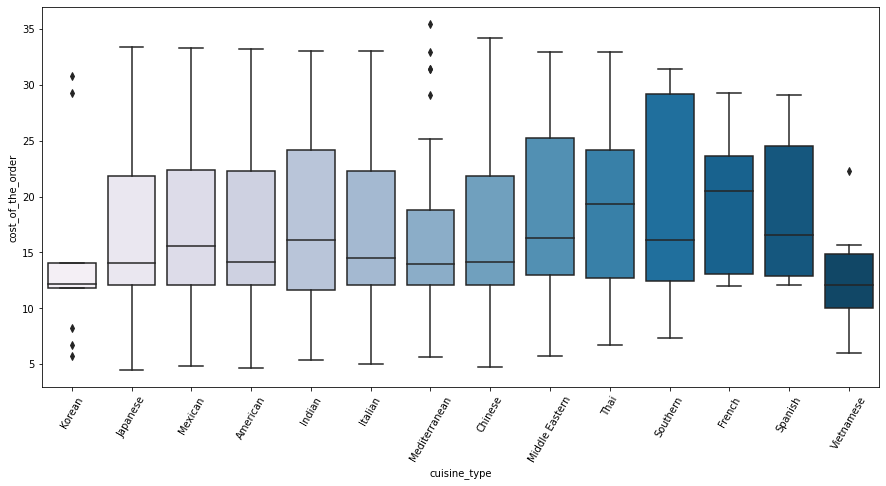

In [60]:
#Cuisine vs Cost of the order
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type', y = 'cost_of_the_order', data = df, palette = "PuBu")
plt.xticks(rotation = 60)
plt.show()

- The mediterenean meals appear to be a bit expensive as they have several outliers in their cost
- The average cost of the order is almost the same across the different cuisine types

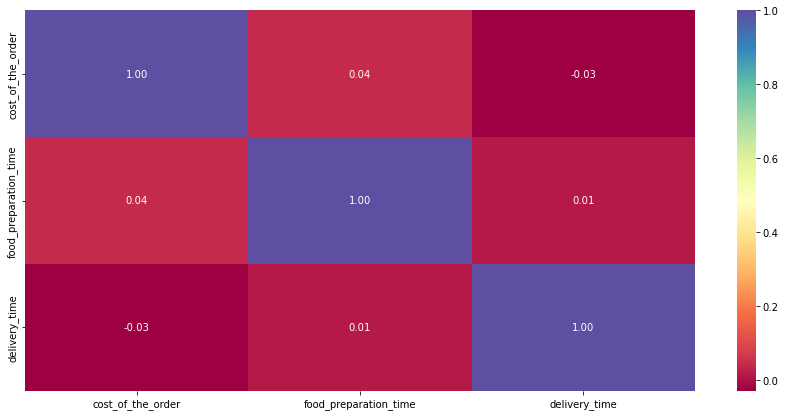

In [61]:
#A correlation heat map of numerical variables
num_cols = ['cost_of_the_order','food_preparation_time','delivery_time']
plt.figure(figsize = (15,7))
sns.heatmap(df[num_cols].corr(), annot= True, cmap = 'Spectral', fmt = '.2f');

- No major correlation is noticeable in the numerical varibales of the data set

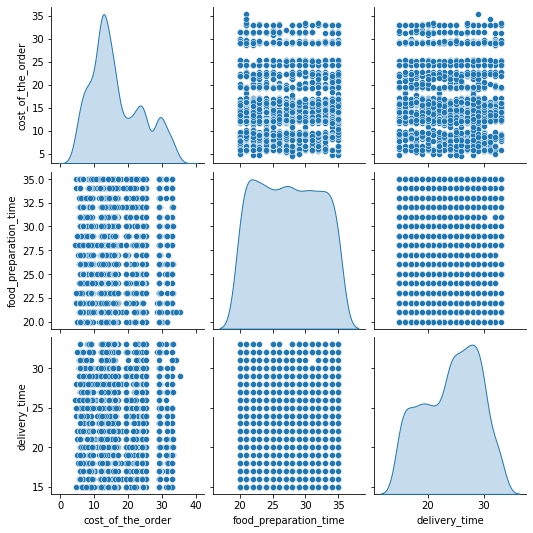

In [62]:
#Pair plot diagram of the numerical variables excluding customer id and order id
sns.pairplot(data = df[num_cols], diag_kind = 'kde');

- There is no display of significant correlation in the dataset variables from the pairplot.

In [63]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

- Shake shack restaurant has the highest cost of orders or revenues from the delivery app
- This is followed by the meatball shop restaurant

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [64]:
#Drop the 'not given' rating and convert the row items from string type to int type
df_rated = df[df['rating'] != 'Not given'].copy()
df_rated['rating'] = df_rated['rating'].astype('int')

#Create a new data frame with only restaurant name and ratin values and display the top 10 values

df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending= False).reset_index()
df_rating_count.head(10)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


In [65]:
#Create a rest names filter to use for picking out the mean of those with above 4 mean rating
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

#Display the list in a descending order, from that with the highest mean to the one with the least
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
Only **four** restaurants would qualify for the promotional offer in the advertisement of the restaurants. These are:
1. The meatball shop
2. Blue ribbon fried chicken
3. Shake shack
4. Blue ribbon sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [66]:
#Create new columns to show rows that meet the criteria for charges
df['orders_greater_than_20'] = df['cost_of_the_order']>20 
df['orders_greater_than_5'] = (df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20)

#Get sum of charged costs greater than 20 usd
billed_costs_20_usd = df[df['orders_greater_than_20'] == True]
charges_greater_than_20_usd = 0.25*billed_costs_20_usd.cost_of_the_order.sum()

#Get sum of charged costs greater than 5 usd but less than 20 usd
billed_costs_5_usd = df[df['orders_greater_than_5'] == True]
charges_greater_than_5_usd = 0.15*billed_costs_5_usd.cost_of_the_order.sum()

#Print the total sum of the two revenues
print('The net revenue generated by the company across all orders is : USD',charges_greater_than_20_usd + charges_greater_than_5_usd)

The net revenue generated by the company across all orders is : USD 6166.303


#### Observations:
The net revenue generated by the company across all orders is : **USD 6,166.303**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [67]:
#Create  a new column to show the total time from order placing to food delivery. 
df['total_preparation_delivery_time'] =df['food_preparation_time'] + df['delivery_time']

#Show a percentage split at above 60 minutes of the new column
(df['total_preparation_delivery_time'] > 60).value_counts(normalize = True)

False    0.894626
True     0.105374
Name: total_preparation_delivery_time, dtype: float64

#### Observations:
The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is **10.5%**

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

The mean delivery time during weekdays is 28.34 and on weekends is 22.47


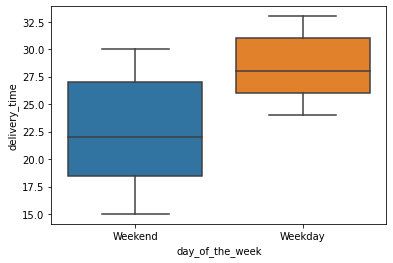

In [68]:
#Use the mean function to get the mean of the two different days of the week
weekday_mean = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_mean = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('The mean delivery time during weekdays is', round(weekday_mean,2),'and on weekends is', round(weekend_mean,2))\

#A boxplot can also be used to show the distribution of the five point plots of the data
sns.boxplot(data= df, x = 'day_of_the_week', y = 'delivery_time');

#### Observations:
- The mean delivery time is higher on weekdays at an average of **28 minutes** than on weekends at an average of **22 minutes**. 
- That is, it takes less time to make deliveries over weekends as compared to making deliveries over weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Data variables captured are not enough to provide a comprehensive feedback, more variables should be added
*  A number of users do not provide feedback. Review the format of giving feedback to make it easy to use or incentivise the same
*  There is a high variation in the cost of delivery. Look at areas that are causing this and address the same.

### Recommendations:

*  Need to review more variables as the ones given do not have much correlation
*  Incentivise already onboarded reastaurants that do are not very active on the app to utilize the app through promotions
*  Improve order delivery times esspecialy over the weekends
*  American cuisine is a favorite, place riders near restaurants with this cuisine to speed up delivery

---